## Notebook 12: Programação orientada a objetos
Neste Notebook, aprendemos o que é Programação orientada a objetos (OOP, do inglês Object Oriented Programming), bem como o que são Classes e como as criar. Aprendemos também como criar gráficos com recurso à OOP e ao pacote `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Uma classe de triângulos
Até agora, aprendemos o que é a programação *funcional*. Na programação funcional, pode escrever ou usar funções que manipulam dados. Por exemplo, considere o caso em que temos de lidar com um determinado número de triângulos. Para cada triângulo, queremos poder calcular a sua área e representá-la graficamente, além de preencher o interior com uma cor. Digamos que temos um número aleatório de $N$ triângulos. Para cada triângulo, temos de guardar os valores $(x,y)$ dos seus três vértices. Assim, criamos arrays para os valores de $x$ de cada vértice e criamos arrays para os valores de $y$ de cada vértice. Depois, escrevemos uma função que calcula a área de um triângulo dados os seus três vértices, e escrevemos uma função que represente graficamente o triângulo dados os três vértices e a cor de preenchimento do triângulo, e, por último, temos de criar um ciclo para todos os vértices. Tudo isto parece ser demasiado trabalhoso, mas é fácil de realizar. Torna-se mais complicado quando queremos mudar o vértice de um triângulo. Temos de saber a sua posição no array e mudar o vértice correto.

É ainda mais complicado quando temos de lidar com triângulos e retângulos. Os triângulos têm três vértices, enquanto os retângulos têm quatro. A função para calcular a área de um retângulo é muito diferente. Por isso, temos de nos certificar de que executamos a função da área de um triângulo quando temos um triângulo e a função da área de um retângulo quando temos um retângulo. A representação gráfica não é muito diferente, mas temos de apresentar quatro vértices em vez de três. Isto começa a complicar um pouco. Não seria bom podermos organizar os dados e as funções, de modo a que os dados soubessem como calcular a sua área ou como se representarem a si mesmos? Pode soar a magia, mas é exatamente isso que a programação orientada a objetos faz.

A programação orientada a objetos é, na sua essência, outra forma de organizar os dados e as funções. Em vez de os definir e armazenar em separado, os dados e as funções são armazenados e unidos no que designamos *Classe*. Os dados que são armazenados designam-se *atributos* e as funções *métodos*. Será provavelmente mais fácil de entender se escrevermos e usarmos uma classe. Considere, por exemplo, a classe `Triangle` que armazena as coordenadas de três vértices. Não se preocupe com a sintaxe para já (já lá vamos). Execute o código abaixo para começarmos a usar a classe.

In [2]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2

Agora que a classe `Triangle` está definida, podemos começar a criar triângulos. Podemos executar a classe `Triangle` tal como uma função e temos de fornecer tuplos dos três vértices. A classe `Triangle` devolve o que se designa um objeto. Um objeto é uma instância de uma classe. Note também que, se escrever:

`Triangle(` 

e premir [shift][tab], surge uma pequena caixa que apresenta os argumentos de entrada esperados (não tem de fornecer o argumento `self`; mais sobre isto posteriormente). Vamos criar um triângulo com os vértices (0,1), (3,0) and (2,3).

In [3]:
t1 = Triangle((0, 1), (3, 0), (2, 3))

`t1` é agora uma instância da classe  `Triangle`. Dizemos simplesmente que `t1` é um triângulo. Armazenamos os três vértices do triângulo. Assim, cada objeto de `Triangle` tem três atributos. Pode descobrir que atributos um objeto tem ao escrever:

`t1.` 

(não se esqueça do ponto) e, em seguida, prima a tecla [TAB]. É possível aceder aos atributos com uma função precedida de ponto.

In [4]:
print(t1)  # não muito útil
print(t1.x0y0)  # primeiro vértice
print(t1.x1y1)  # segundo vértice
print(t1.x2y2)  # terceiro vértice

(0, 1)
(3, 0)
(2, 3)


Vamos regressar à classe `Triangle`. Quando executamos a classe `Triangle` (em linguagem técnica: criamos um objeto de `Triangle`, ou ainda mais técnica: criamos uma instância da classe `Triangle`), o Python calcula a função `__init__`. Esta função é o chamado *construtor*. Vai construir um objeto. No construtor, define que argumentos têm de ser fornecidos para criar um triângulo. O nome `__init__` (são *dois* underscores antes e depois da palavra `init`) é necessário (é um dos poucos casos infelizes de escolha de nomes na linguagem Python). O primeiro argumento é `self` e diz ao Python qual é o nome do próprio objeto na classe.

Vimos acima que escrever `print t1` devolve uma mensagem sem sentido. Isto pode ser resolvido ao incluir uma função de representação, que tem de ser exatamente `__repr__`. Esta função é calculada quando o objeto é apresentado (ou convertido numa string).

In [5]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
    def __repr__(self):
        return 'Triângulo com vértices:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
t1 = Triangle((0, 1), (3, 0), (2, 3))
print(t1)

Triângulo com vértices:(0, 1)(3, 0)(2, 3)


Na classe `Triangle`, os três vértices são armazenados como três tuplos. Assim, o valor de $x$ do primeiro vértice é `self.x0y0[0]` e o valor de $y$ é `self.x0y0[1]`. Poderá ser útil armazenar um array dos três valores de $x$ dos três vértices e um array dos três valores de $y$ dos três vértices. Se forem armazenadas, é razoavelmente fácil calcular a área $A$ de um triângulo através da seguinte fórmula:

$A = \frac{1}{2}|(x_0-x_2)(y_1-y_0) - (x_0-x_1)(y_2-y_0)|$

Vamos alterar a classe `Triangle` para incluir estes dois atributos adicionais e uma função `area`.

In [6]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
    def __repr__(self):
        return 'Triângulo com vértices:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
    def area(self):
        A = 0.5 * np.abs((self.x[0] - self.x[2]) * (self.y[1] - self.y[0]) - 
                         (self.x[0] - self.x[1]) * (self.y[2] - self.y[0]))
        return A

Note que a função `area` ultrapassa o objeto `self`; assim que identifica `self`, tem acesso a todos os seus atributos e funções. Podemos agora criar um objeto de `Triangle` e calcular a sua área da seguinte forma (não se esqueça de executar a nova classe `Triangle` acima primeiro).

In [7]:
t1 = Triangle( (0,1), (3,0), (2,3) )
print(t1.area())

4.0


No código acima, a função `area` é calculada através da sintaxe de funções precedidas de ponto, em que `self` na função é automaticamente substituída pela variável antes do ponto (neste caso, `t1`). A sintaxe de funções precedidas de ponto é curta em comparação com a muito mais comprida:

In [8]:
print(Triangle.area(t1))

4.0


Note que as classes são muito convenientes, pois o objeto do triângulo sabe quais são os seus próprios vértices. Ao escrever `t1.` e premir [TAB], são apresentados não apenas todos os atributos, mas também todas as funções de um objeto. Outra forma é usar a função `dir`.

In [9]:
dir(t1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'area',
 'x',
 'x0y0',
 'x1y1',
 'x2y2',
 'y']

Vamos expandir a classe `Triangle` ao adicionar uma função que represente graficamente um triângulo preenchido. A cor do triângulo é fornecida com um argumento de palavra-chave no construtor. Assim, se a cor não for indicada, deve ser usado o valor predefinido.

In [10]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2, color='b'):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
        self.color = color
    def __repr__(self):
        return 'Triângulo com vértices:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
    def area(self):
        A = 0.5 * np.abs((self.x[0]-self.x[2])*(self.y[1]-self.y[0]) - 
                         (self.x[0]-self.x[1])*(self.y[2]-self.y[0]))
        return A
    def plot(self):
        plt.fill(self.x, self.y, color=self.color)

Vamos criar três triângulos e armazená-los numa lista. Depois, executamos um ciclo para os triângulos na lista e representamo-los num gráfico. Note como podemos executar um ciclo para os triângulos na lista `tlist`:

`for t in tlist:`

Assim, cada vez que executamos o ciclo, `t` é o triângulo seguinte na lista `tlist`.

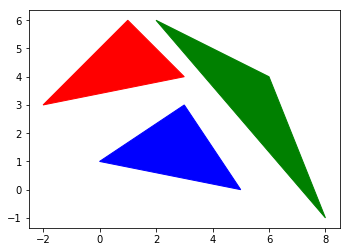

In [11]:
tlist = []  # comece com uma lista vazia
t1 = Triangle((0, 1), (5, 0), (3, 3), 'b')
tlist.append(t1)  # adicione t1 à lista
t2 = Triangle((3, 4), (1, 6), (-2, 3), 'r')
tlist.append(t2)
t3 = Triangle((8, -1), (6, 4), (2, 6), 'g')
tlist.append(t3)
plt.figure()
for t in tlist:
    t.plot()
plt.axis('scaled');

Da mesma forma, a área total dos três triângulos é:

In [12]:
areatot = 0.0
for t in tlist:
    areatot += t.area()
print('área total:', areatot)

área total: 20.5


### <a name="back1"></a>Exercício 1. Uma classe de Círculo
Crie uma classe `Circle` que armazene as coordenadas $(x,y)$ do centro de um círculo e o respetivo raio $R$. As funções da classe são: `area`, que devolve a área do círculo e `plot`, que representa graficamente um círculo preenchido com uma transparência de 0,5 (i.e., usa o argumento de palavra-chave `alpha=0.5` na função `fill`). O argumento de entrada da função `plot` é um raio $R^*$. Com um raio do círculo inferior a $R^*$, preencha o círculo com a cor azul. Com um raio do círculo superior a $R^*$, preencha o círculo com a cor vermelha. Demonstre que a sua classe `Circle` funciona ao carregar o ficheiro de texto `circle_data.txt`. Este ficheiro contém os dados de $x$, $y$ e $R$ para 20 círculos. Calcule e indique a área total de todos os círculos no ficheiro. Crie uma representação gráfica dos 20 círculos para demonstrar que as cores estão devidamente atribuídas, utilizando $R^*=1$.

<a href="#ex1answer">Soluções do Exercício 1</a>

### <a name="back2"></a>Exercício 2. Caudal para um conjunto de poços de extração e injeção
Considere um poço de extração com uma descarga $Q$. O poço está situado em $(x,y)=(x_w,y_w)$, num aquífero com espessura $H$ e condutividade hidráulica $k$. A cabeceira (*head*, em inglês) a uma distância radial $R$ do poço está fixada a $h_0$. A cabeceira das águas subterrâneas $h$ diminui em direção ao poço (p. ex., Eq. 11.4 em Verruijt (2012) Soil Mechanics)

$$h = \frac{Q}{2\pi kH} \ln\left(\frac{r}{R}\right) + h_0$$

onde $r$ é a distância radial do poço $r=\sqrt{(x-x_w)^2+(y-y_w)^2}$. 

Em seguida, considere um sistema com $N$ poços de extração e injeção perto do centro de uma área grande; a soma das descargas de todos os poços de extração e injeção é zero (ou seja, toda a água extraída também é injetada; isto ocorre geralmente em sistemas de bombeamento e tratamento, sistemas de arrefecimento, drenagem de locais de construção, etc.). A mudança na cabeceira gerada por todos os poços em conjunto é aproximadamente zero ao longo de um círculo com raio $R$. A distribuição da cabeceira num sistema de $N$ poços pode ser escrita como (p. ex., Eq. 11.9 em Verruijt, 2010, Soil Mechanics)

$$h = \sum_{n=1}^N \frac{Q_n}{2\pi kH} \ln\left(\frac{r_n}{R}\right)$$

onde $Q_n$ é a descarga do poço $n$ (positiva em relação à extração) situado em $(x_n,y_n)$, e em que $r_n=\sqrt{(x-x_n)^2+(y-y_n)^2}$ é a distância do poço $n$.

Escreva uma classe `Well` que armazene a localização de um poço, a descarga de um poço, o raio $R$ da área circular e os parâmetros do aquífero $k$ e $H$. A classe do poço tem um método designado `head`, que assume as coordenadas $x,y$ como argumentos de entrada e devolve a contribuição do poço para a cabeceira em $x,y$ (o termo $Q_n/(2\pi kH)\ln(r_n/R)$ no somatório acima).

Teste a sua implementação para um aquífero com $k=2$ m/d, $H=10$ m, $R=1000$ m e um sistema de três poços: um poço de extração (com descarga positiva) e dois poços de injeção (com descarga negativa).

* $(x_w,y_w)=(0,0)$, $Q=100$ m$^3$/d
* $(x_w,y_w)=(-20,0)$, $Q=-50$ m$^3$/d
* $(x_w,y_w)=(20,0)$, $Q=-50$ m$^3$/d

Quando a implementação estiver correta, a cabeceira provocada pelos três poços em $(x,y)=(20,5)$ será de 0,2968 m. Atenção: não caia na ratoeira da divisão de números inteiros (lembre-se de que `1/2 = 0` enquanto `1,0 / 2 = 0,5`). Represente graficamente a variação da cabeceira ao longo da linha $y=1$ para $x$ com variação de -40 a +40.

<a href="#ex2answer">Soluções do Exercício 2</a>

### Arrays são objetos
Agora que aprendeu sobre a OOP, poderá verificar que muitas das funcionalidades de Python que utiliza são, de facto, baseadas em OOP. Por exemplo, quando cria um array, o array é um objeto.

In [13]:
x = np.arange(12)
print('tipo de x:', type(x))

tipo de x: <class 'numpy.ndarray'>


Assim, um array tem atributos e métodos de classe associados. Pode escrever `dir(x)` para encontrar todos os atributos e métodos (há muitos). Alguns dos atributos de um array incluem o número de dimensões e a forma. Pode até mudar a forma (desde que se certifique de que a forma se adequa ao array) ao alterar o atributo da forma.

In [14]:
print('número de dimensões de x:', x.ndim)
print('forma de x:', x.shape)
x.shape = (4, 3)
print('nova forma de x:', x.shape)
print(x)

número de dimensões de x: 1
forma de x: (12,)
nova forma de x: (4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


Um array também tem várias funções, incluindo uma função que devolve o valor médio do array ou o valor máximo de um array.

In [15]:
print('média de x: ', x.mean())
print('máximo de x:  ', x.max())

média de x:  5.5
máximo de x:   11


### As funcionalidades de representação gráfica são objetos
Todos os comandos de representação gráfica que utilizámos até agora são funções que fazem parte do pacote `matplotlib`. Não é, por isso, surpreendente que o pacote `matplotlib` tenha um design focado no objeto. As representações gráficas podem ser criadas a partir do uso de estruturas focadas no objeto. Isto requer um pouco de escrita adicional mas, no final, obtemos flexibilidade extra e a capacidade de criar animações.

Através da sintaxe OO, criamos, em primeiro lugar, um objeto `figure` e especificamos o tamanho através do argumento de palavra-chave `figsize` (o tamanho da figura é especificado em polegadas). Depois, adicionamos um eixo à figura com o comando `add_axes` (note que é `axes` com um `e`) ao especificar a localização *relativa* do eixo na figura. As localizações da esquerda, base, largura e altura são especificadas em coordenadas relativas (ambas as direções vertical e horizontal vão de 0 a 1). Para a representação gráfica, utilizamos o método `plot` do eixo.

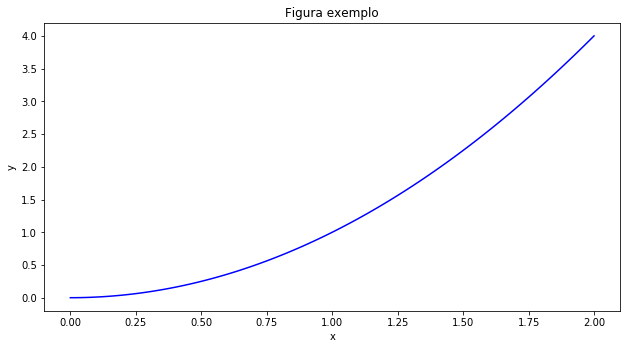

In [16]:
x = np.linspace(0, 2, 100)
y = x ** 2
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, y, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Figura exemplo');

Podemos acrescentar o número de eixos que quisermos à figura e decidir exatamente onde cada eixo se situa.

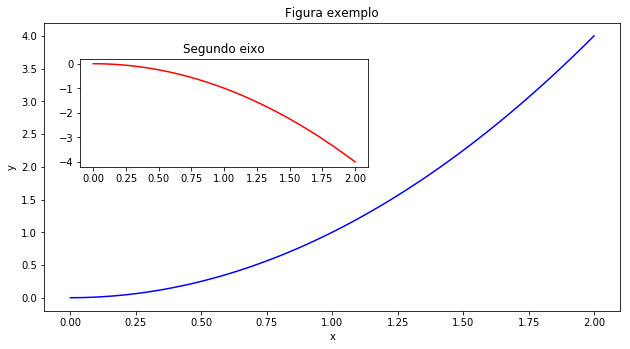

In [17]:
x = np.linspace(0, 2, 100)
y = x ** 2
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, y, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Figura exemplo')
ax2 = fig.add_axes([0.15, 0.5, 0.4, 0.3])
ax2.plot(x,-y,'r')
ax2.set_title('Segundo eixo');

### Matplotlib patches
O pacote de representação gráfica `matplotlib` inclui um conjunto de classes para definir formas, designadas *patches* em `matplotlib`. Existem *patches* para muitas formas diferentes incluindo círculos, elipses, polígonos, fatias e setas. Aqui aprendemos a desenhar estes patches. Num notebook futuro, aprenderemos a movê-las de forma interativa.

O processo de inclusão de um *patch* num gráfico é sempre igual. Em primeiro lugar, cria um eixo, depois um objeto de *patch* e, em seguida, adiciona o objeto de *patch* ao eixo. Cada objeto de *patch* tem alguns argumentos de entrada e vários argumentos de palavra-chave. Os argumentos de palavra-chave incluem: `ec` para a cor do contorno, `fc` para a cor da superfície, `alpha` para a transparência e `zorder` para a ordem em que são representados (o *patch* com o valor de `zorder` superior fica por cima). Os nomes de todas as classes de *patch* começam por maiúscula: `Circle`, `Ellipse`, `Polygon`, `Wedge`, `Arrow`. Para poderem ser usadas, estas classes têm de ser importadas através da sintaxe `matplotlib.patches`. Use o sistema de ajuda para saber mais acerca dos argumentos de entrada necessários. O gráfico abaixo contém dois círculos, estando o mais pequeno em cima do maior. A cor da superfície do gráfico é a mesma do círculo pequeno para que pareça que o círculo grande tem um orifício. A proporção do eixo é definida como `'equal'` no momento de criar o gráfico. A função `autoscale` tem de ser calculada para definir os limites dos eixos, de modo a que os *patches* se adequem devidamente ao eixo. Em alternativa, pode executar as funções `ax.set_xlim` e `ax.set_ylim` para selecionar limites à sua escolha.

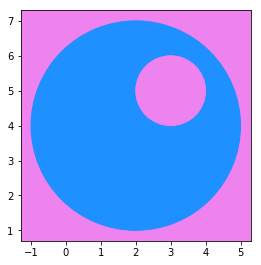

In [18]:
from matplotlib.patches import Circle
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8], facecolor='violet', aspect='equal')
small = Circle(xy=(3, 5), radius=1, fc='violet', ec='violet', zorder=2)
big = Circle(xy=(2, 4), radius=3, fc='dodgerblue', ec='dodgerblue', zorder=1)
ax.add_patch(small)
ax.add_patch(big)
ax.autoscale()

### <a name="back3"></a>Exercício 3. Matplotlib patches
Escreva código Python para criar a figura apresentada abaixo, utilizando *patches* do pacote `matplotlib`. Use cores à sua escolha. Escreva 'círculo', 'elipse', etc. no interior dos *patches* correspondentes, utilizando a função `ax.text`.

<img src="http://i.imgur.com/ObuPLD7.png" alt="Patches" width=800pt>

<a href="#ex3answer">Soluções do Exercício 3</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

área total: 67.8963703559


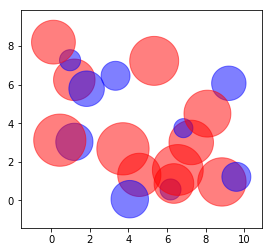

In [19]:
class Circle:
    def __init__(self, x0, y0, R):
        self.x0 = x0
        self.y0 = y0
        self.R = R
    def area(self):
        A = np.pi * self.R ** 2
        return A
    def plot(self, Rstar):
        if self.R < Rstar:
            color = 'b'
        else:
            color = 'r'
        alpha = np.linspace(0, 2 * np.pi, 100)
        plt.fill(self.x0 + self.R * np.cos(alpha), self.y0 + self.R * np.sin(alpha), 
                 color=color, alpha=0.5)

data = np.loadtxt('circle_data.txt')
clist = []
for i in range(20):
    c = Circle(data[i, 0], data[i, 1], data[i, 2])
    clist.append(c)
areatot = 0.0
plt.figure()
for c in clist:
    areatot += c.area()
    c.plot(1.0)
plt.axis('scaled')
print('área total:', areatot)

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

head em (20, 5) é: 0.296831810871


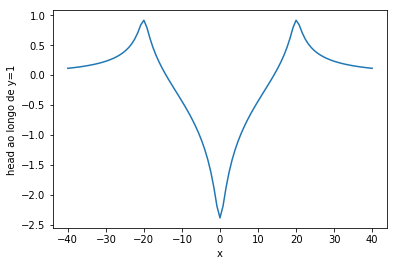

In [20]:
class Well:
    def __init__(self, xw, yw, Q, k, H, R):
        self.xw = xw
        self.yw = yw
        self.Q = Q
        self.k = k
        self.H = H
        self.R = R
    def head(self, x, y):
        r = np.sqrt((x - self.xw) ** 2 + (y - self.yw) ** 2)
        h = self.Q / (2 * np.pi * self.k * self.H) * np.log(r / self.R)
        return h
    
w1 = Well(0, 0, 100, 2, 10, 1000)
w2 = Well(-20, 0, -50, 2, 10, 1000)
w3 = Well(20, 0, -50, 2, 10, 1000)
wells = [w1, w2, w3]

h = 0.0
for w in wells:
    h += w.head(20, 5)
print('head em (20, 5) é:', h)

x = np.linspace(-40, 40, 101)
h = np.zeros_like(x)
for w in wells:
    h += w.head(x, 1)
plt.figure()
plt.plot(x, h)
plt.xlabel('x')
plt.ylabel('head ao longo de y=1');

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

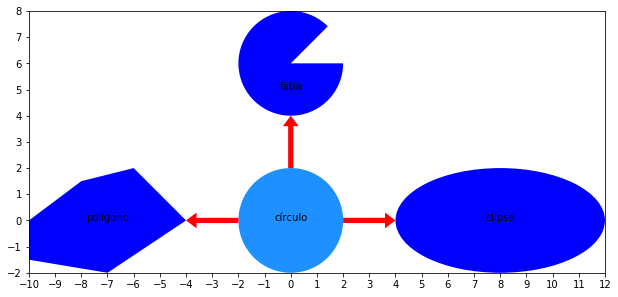

In [21]:
from matplotlib.patches import Circle, Ellipse, Polygon, Arrow, Wedge
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
c1 = Circle(xy=(0, 0), radius=2, fc='dodgerblue')
ax.add_patch(c1)
a1 = Arrow(x=2, y=0, dx=2, dy=0, fc='r')
ax.add_patch(a1)
e1 = Ellipse(xy=(8, 0), width=8, height=4, fc='b')
ax.add_patch(e1)
a2 = Arrow(x=0, y=2, dx=0, dy=2, fc='r')
ax.add_patch(a2)
w1 = Wedge(center=(0, 6), r=2, theta1=45, theta2=0, fc='b')
ax.add_patch(w1)
a3 = Arrow(x=-2, y=0, dx=-2, dy=0, fc='r')
ax.add_patch(a3)
p1 = Polygon(xy=[(-4, 0), (-6, 2), (-8, 1.5), (-10, 0),
                 (-10, -1.5), (-7, -2)], fc='b')
ax.add_patch(p1)
ax.set_xlim(-10, 12)
ax.set_xticks(np.arange(-10, 13))
ax.set_ylim(-2, 8)
ax.set_yticks(np.arange(-2, 9, 1))
ax.text(0, 0, 'círculo', ha='center')
ax.text(8, 0, 'elipse', ha='center')
ax.text(-7, 0, 'polígono', ha='center')
ax.text(0, 5, 'fatia', ha='center');

<a href="#back3">Voltar ao Exercício 3</a>

A obra "Notebook 12: Programação orientada a objetos" é um derivado de [Notebook 12: Object oriented programming](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook12_oop/py_exploratory_comp_12_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt). "Notebook 12: Programação orientada a objetos" é publicado sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt) por Educa2030.